In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

#Train-Test Split
from sklearn.model_selection import train_test_split

#Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\ad1.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,78.8400,30,68448.9400,161.7900,Front-line even-keeled website,Silvaton,Male,Peru,04/04/2016 03:57,1
1,60.2300,35,66815.5400,216.2400,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,06/18/2016 16:02,0
2,46.2000,49,62109.8000,135.2400,Enhanced maximized access,Lake Vanessa,Male,Chile,06/26/2016 07:01,1
3,87.8500,31,50055.3300,134.4600,Total zero administration software,Port Sherrystad,Male,French Polynesia,04/18/2016 21:07,1
4,64.3800,37,55121.6500,232.5400,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,07/18/2016 18:33,0


In [3]:
print(df.columns)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


In [4]:
df.shape

(999, 10)

In [5]:
df['Clicked on Ad'].value_counts()

1    522
0    477
Name: Clicked on Ad, dtype: int64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

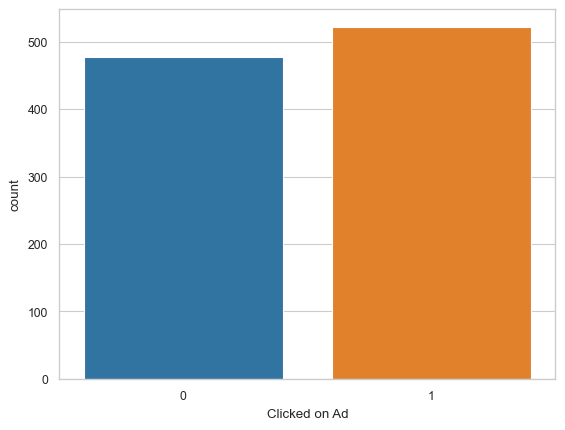

In [6]:
sns.countplot(data = df , x = 'Clicked on Ad')


### Checking the Data Quality / EDA

In [7]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [8]:
total =df.isnull().sum()
total

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Gender                              object
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object

In [10]:
x=df.iloc[:,0:9]
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp
0,78.8400,30,68448.9400,161.7900,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:00
1,60.2300,35,66815.5400,216.2400,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:00
2,46.2000,49,62109.8000,135.2400,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:00
3,87.8500,31,50055.3300,134.4600,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:00
4,64.3800,37,55121.6500,232.5400,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:00
5,46.2000,24,56194.5600,178.8500,Persistent fault-tolerant service-desk,Hughesport,Female,Kazakhstan,2016-05-10 17:13:00
6,66.1800,60,60575.9900,151.5400,Polarized tangible collaboration,Shelbyport,Male,United Arab Emirates,2016-01-16 23:37:00
7,44.7200,21,61009.1000,226.5400,Advanced disintermediate data-warehouse,Williamsside,Male,Eritrea,2016-07-17 18:55:00
8,79.8100,31,48867.3600,127.8300,Polarized 5thgeneration matrix,New Gabriel,Female,Jersey,2016-05-23 00:32:00
9,66.0100,23,52182.2300,108.2700,Realigned zero tolerance emulation,Port Cassie,Female,Chad,2016-06-01 09:27:00


In [12]:
df.drop(['City','Ad Topic Line'],axis=1 , inplace=True)

In [14]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Country,Timestamp,Clicked on Ad
0,78.8400,30,68448.9400,161.7900,Male,Peru,2016-04-04 03:57:00,1
1,60.2300,35,66815.5400,216.2400,Male,Papua New Guinea,2016-06-18 16:02:00,0
2,46.2000,49,62109.8000,135.2400,Male,Chile,2016-06-26 07:01:00,1
3,87.8500,31,50055.3300,134.4600,Male,French Polynesia,2016-04-18 21:07:00,1
4,64.3800,37,55121.6500,232.5400,Female,Bosnia and Herzegovina,2016-07-18 18:33:00,0
5,46.2000,24,56194.5600,178.8500,Female,Kazakhstan,2016-05-10 17:13:00,0
6,66.1800,60,60575.9900,151.5400,Male,United Arab Emirates,2016-01-16 23:37:00,1
7,44.7200,21,61009.1000,226.5400,Male,Eritrea,2016-07-17 18:55:00,0
8,79.8100,31,48867.3600,127.8300,Female,Jersey,2016-05-23 00:32:00,0
9,66.0100,23,52182.2300,108.2700,Female,Chad,2016-06-01 09:27:00,1


In [15]:
df['Timestamp'].value_counts()

2016-04-07 20:34:00    61
2016-03-18 16:04:00    36
2016-03-06 06:51:00    24
2016-05-03 01:09:00    24
2016-03-02 10:07:00    21
2016-07-08 21:18:00    19
2016-02-07 07:41:00    19
2016-02-15 16:18:00    17
2016-06-26 07:01:00    15
2016-01-22 12:58:00    15
2016-01-09 07:28:00    14
2016-01-17 09:31:00    13
2016-04-04 07:07:00    13
2016-05-23 00:32:00    12
2016-06-17 23:19:00    12
2016-06-13 18:50:00    11
2016-01-01 08:27:00    10
2016-05-05 11:07:00    10
2016-06-18 16:02:00    10
2016-06-29 01:19:00     9
2016-03-03 20:20:00     9
2016-07-17 18:55:00     8
2016-03-08 05:12:00     8
2016-04-22 20:32:00     8
2016-04-18 21:07:00     8
2016-01-21 04:30:00     8
2016-04-08 14:35:00     8
2016-04-04 03:57:00     7
2016-04-10 16:08:00     7
2016-01-31 08:50:00     7
2016-07-06 23:09:00     7
2016-01-16 23:37:00     7
2016-02-14 03:50:00     7
2016-05-31 17:50:00     7
2016-02-12 05:20:00     7
2016-01-05 12:59:00     7
2016-01-14 08:27:00     7
2016-02-28 18:52:00     7
2016-06-12 1

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Density'>

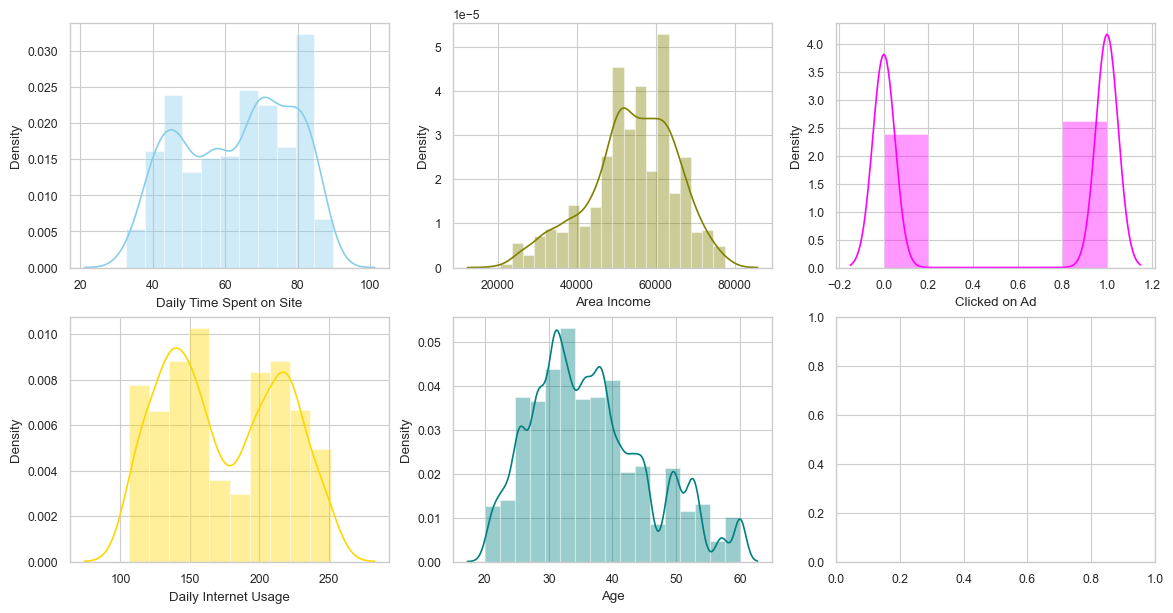

In [16]:
f, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.distplot(df["Daily Time Spent on Site"] , color="skyblue", ax=axes[0, 0])
sns.distplot(df["Area Income"] , color="olive", ax=axes[0, 1])
sns.distplot(df["Daily Internet Usage"] , color="gold", ax=axes[1, 0])
sns.distplot(df["Age"] , color="teal", ax=axes[1, 1], kde_kws={'bw': 0.1})
sns.distplot(df["Clicked on Ad"] , color="magenta", ax=axes[0, 2], kde_kws={'bw': 0.1})

<AxesSubplot:xlabel='Gender', ylabel='count'>

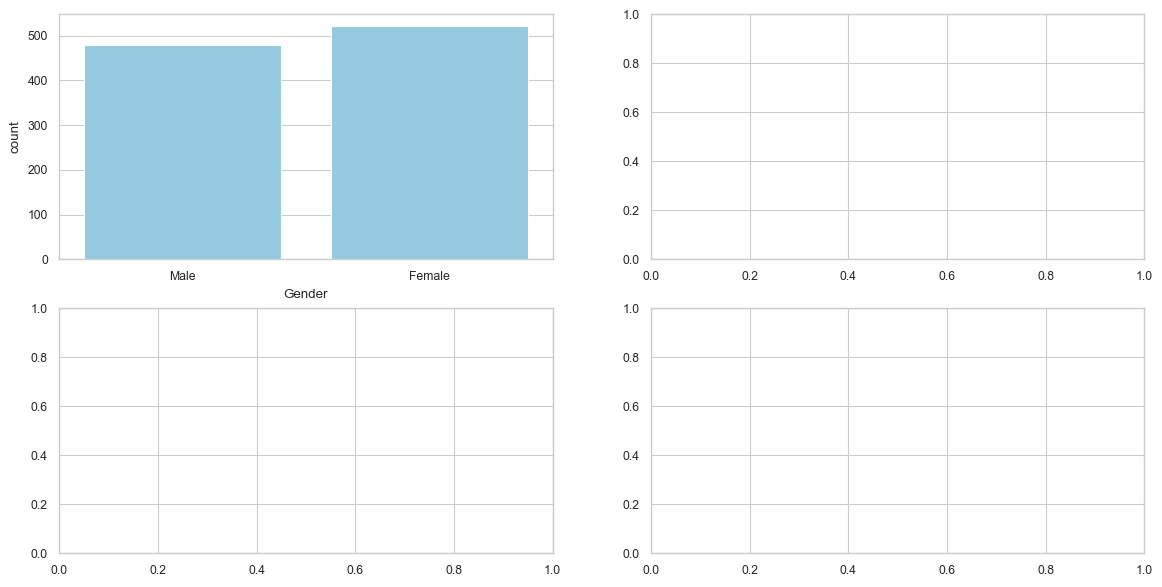

In [18]:
f, axes = plt.subplots(2, 2, figsize=(14, 7))
sns.countplot( df["Gender"] , color="skyblue", ax=axes[0, 0])

<AxesSubplot:>

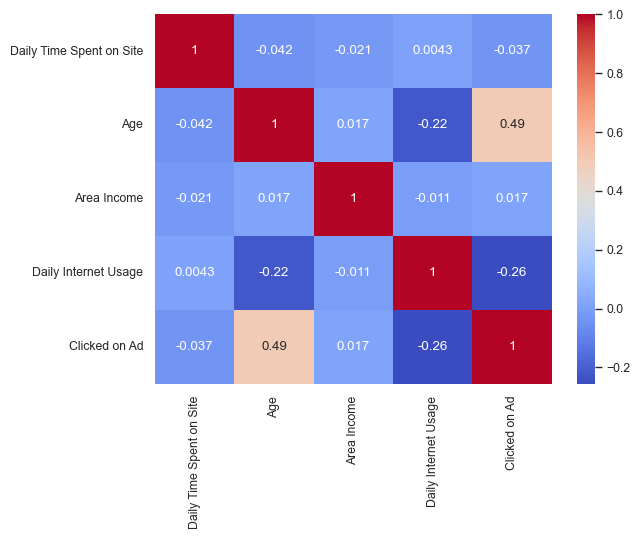

In [19]:
corrmat = df.corr()
sns.heatmap(corrmat,annot = True, cmap = 'coolwarm' )

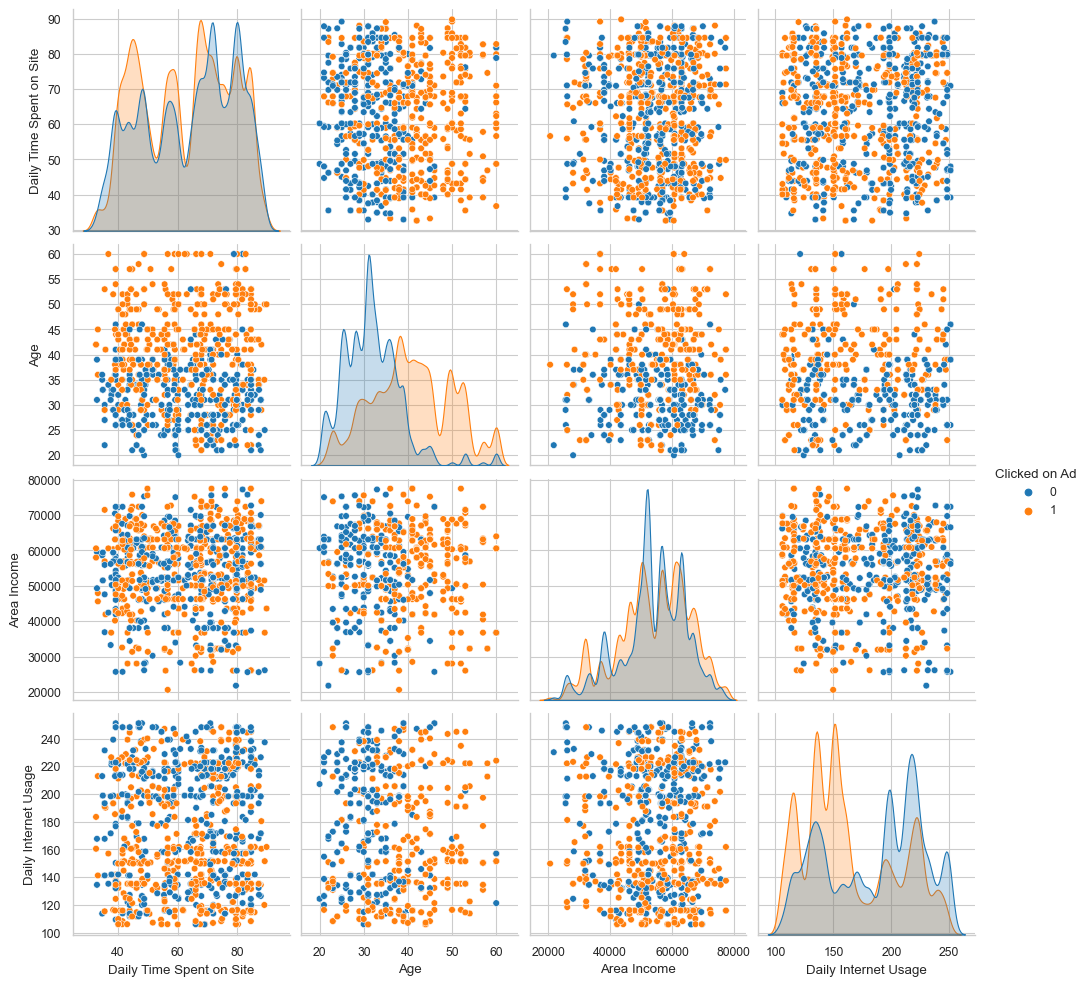

In [20]:
sns.pairplot(df, hue = 'Clicked on Ad', diag_kws={'bw': 0.1})

In [21]:
#Convert nominal category columns to number
cat_cols = ['Gender']
df = pd.get_dummies(df,columns = cat_cols)

In [22]:
x = df.drop(["Clicked on Ad"], axis=1)
y = df["Clicked on Ad"]

In [23]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [24]:
#Check shape to make sure it is all in order
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((749, 8), (250, 8), (749,), (250,))